In [133]:
import pandas as pd
data = "C:/Users/Aditya/Downloads/countries.csv"
df = pd.read_csv(data)
df.head()


,Unnamed: 0,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Population,Density pop./km2,Population source,Crime Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80,5814461,135.0,Official quarterly estimate,25.10,31.92,58.57,61.74,100.75,100.88
1,1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24,8586550,208.0,Official provisional figure,21.60,50.25,87.89,120.27,123.01,119.53
2,2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87,5527405,16.0,Official monthly estimate,23.32,26.16,49.18,56.52,76.81,99.93
3,3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70,25649909,3.0,Official estimate,41.36,34.86,55.04,67.23,70.32,107.31
4,4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61,17445781,420.0,Official population clock,27.62,35.18,55.30,55.87,80.48,90.73


In [177]:
df2 = pd.DataFrame()
df2 = df[["Population", "Population source", "Quality of Life Index", "Pollution Index"]]
df2.dtypes

Population                 int64
Population source         object
Quality of Life Index    float64
Pollution Index          float64
dtype: object

In [135]:
from statistics import mode
df3 = pd.DataFrame()
df3 = df[["Population source"]]
mode_pop_source = df3.mode()
print(mode_pop_source)

   Population source
0  Official estimate


In [9]:
from statistics import mode
mode_pop_source = df[["Population source"]].mode()
print(mode_pop_source)

   Population source
0  Official estimate


In [136]:
from scipy.stats import shapiro

# Assuming 'data' is the column or dataset you want to check
stat, p_value = shapiro(df['Pollution Index'])

# Check the p-value
alpha = 0.05
print(f'Shapiro-Wilk Test:\nStatistic={stat}, p-value={p_value}')
if p_value > alpha:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


Shapiro-Wilk Test:
Statistic=0.9568948745727539, p-value=0.00995547417551279
The data does not appear to be normally distributed.


In [137]:
df4 = pd.DataFrame()
df4 = df[["Population"]]
mean_population = df4.mean()
median_population = df4.median()
print(mean_population)
print(median_population)


Population    8.082307e+07
dtype: float64
Population    18019642.0
dtype: float64


In [138]:
summary = df4.describe()
print(summary)

         Population
count  7.800000e+01
mean   8.082307e+07
std    2.220903e+08
min    3.603900e+05
25%    6.074774e+06
50%    1.801964e+07
75%    6.488991e+07
max    1.401812e+09


In [139]:
print(df4.median())

Population    18019642.0
dtype: float64


In [140]:
df5 = pd.DataFrame()
df5 = df[["Quality of Life Index"]]
mean_quality = df5.mean()
median_quality = df5.median()
print(mean_quality)
print(median_quality)

Quality of Life Index    134.361026
dtype: float64
Quality of Life Index    133.95
dtype: float64


In [141]:
df6 = pd.DataFrame()
df6 = df[["Pollution Index"]]
mean_pollution = df6.mean()
median_pollution = df6.median()
print(mean_pollution)
print(median_pollution)

Pollution Index    53.218462
dtype: float64
Pollution Index    57.125
dtype: float64


In [142]:
std_population = df4. std()
std_quality = df5.std()
std_pollution = df6.std()
print(f"The standard deviation of population is: {std_population}")
print(f"The standard deviation of quality of life index is: {std_quality}")
print(f"The standard deviation of pollution is: {std_pollution}")

The standard deviation of population is: Population    2.220903e+08
dtype: float64
The standard deviation of quality of life index is: Quality of Life Index    34.3178
dtype: float64
The standard deviation of pollution is: Pollution Index    20.917777
dtype: float64


In [143]:
#Coefficient of variation is ratio of standard deviation to mean
cv_quality_of_life_index = std_quality/mean_quality
cv_pollution_index = std_pollution/mean_pollution
print(f'The coefficient of variation for Quality of Life Index is : {cv_quality_of_life_index}')
print(f'The coefficient of variation for Pollution Index is : {cv_pollution_index}')

The coefficient of variation for Quality of Life Index is : Quality of Life Index    0.255415
dtype: float64
The coefficient of variation for Pollution Index is : Pollution Index    0.393055
dtype: float64


In [145]:
#Coefficient of variation is ratio of standard deviation to mean
cv_quality_of_life_index = std_quality/mean_quality
cv_pollution_index = std_pollution/mean_pollution
cv_quality_of_life_index = cv_quality_of_life_index.reindex(index=cv_pollution_index.index)

print(f'The coefficient of variation for Quality of Life Index is : {cv_quality_of_life_index}')
print(f'The coefficient of variation for Pollution Index is : {cv_pollution_index}')

#Comparing variability
if cv_quality_of_life_index.any() > cv_pollution_index.any():
    print("The Quality of Life Index has more variability") 
else:
    print("The Pollution Index has more variability")

The coefficient of variation for Quality of Life Index is : Pollution Index   NaN
dtype: float64
The coefficient of variation for Pollution Index is : Pollution Index    0.393055
dtype: float64
The Pollution Index has more variability


In [146]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame
df7 = df[['Country', 'Density pop./km2']]

def outlier_detection(df7):
    q1 = np.percentile(df7['Density pop./km2'], 25)
    q3 = np.percentile(df7['Density pop./km2'], 75)
    # Calculating interquartile range
    IQR = q3 - q1
    # Calculating lower and upper limit
    lwr_limit = q1 - 1.5 * IQR
    upr_limit = q3 + 1.5 * IQR
    # Defining outliers
    outliers = (df7['Density pop./km2'] > upr_limit) | (df7['Density pop./km2'] < lwr_limit)
    # Get countries with outlier values
    outlier_countries = df7.loc[outliers, 'Country'].tolist()
    return outlier_countries

outlier_countries = outlier_detection(df7)

# Print or use the 'outlier_countries' list as needed
print(outlier_countries)


['Singapore', 'Taiwan', 'South Korea', 'Lebanon', 'Hong Kong', 'Bangladesh']


In [147]:
# Creating Dataframe
df8 = pd.DataFrame()
df8 = df[['Quality of Life Index', 'Purchasing Power Index', 'Pollution Index', 'Safety Index', 
          'Cost of Living Index', 'Restaurant Price Index', 'Climate Index']]
# Calculating correlation with Quality of Life Index
corr_quality_index = df8.corrwith(df8['Quality of Life Index'], method = 'pearson')
df9 = pd.DataFrame(columns = ['Variable', 'Correlation', 'Strength'])

# Categorize correlation strength
for column, correlation in corr_quality_index.items():
    if correlation == 1:
        strength = "Perfectly Positive"
    elif  correlation > 0.7:
        strength = "strong positive"
    elif 0.7 >=correlation > 0.3:
        strength = "normal positive"
    elif correlation < -0.7:
        strength = "strong negative"
    elif correlation < -0.3:
        strength = "normal negative"
    else:
        strength = "weak or no"
    df9 = df9.append({'Variable': column, 'Correlation': correlation, 'Strength': strength}, ignore_index=True)
print(df9)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_2776\3104113114.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df9 = df9.append({'Variable': column, 'Correlation': correlation, 'Strength': strength}, ignore_index=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_2776\3104113114.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df9 = df9.append({'Variable': column, 'Correlation': correlation, 'Strength': strength}, ignore_index=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_2776\3104113114.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df9 = df9.append({'Variable': column, 'Correlation': correlation, 'Strength': strength}, ignore_index=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_2776\3104113114.py:23:

                 Variable Correlation            Strength
0   Quality of Life Index         1.0  Perfectly Positive
1  Purchasing Power Index    0.844027     strong positive
2         Pollution Index   -0.900211     strong negative
3            Safety Index    0.592168     normal positive
4    Cost of Living Index    0.707451     strong positive
5  Restaurant Price Index    0.750574     strong positive
6           Climate Index    0.052183          weak or no


C:\Users\Aditya\AppData\Local\Temp\ipykernel_2776\3104113114.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df9 = df9.append({'Variable': column, 'Correlation': correlation, 'Strength': strength}, ignore_index=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_2776\3104113114.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df9 = df9.append({'Variable': column, 'Correlation': correlation, 'Strength': strength}, ignore_index=True)


In [148]:
correlation_matrix = df8.corr()

# Find the pair with the strongest positive correlation (excluding correlation coefficient 1)
print(correlation_matrix)


                        Quality of Life Index  Purchasing Power Index  \
Quality of Life Index                1.000000                0.844027   
Purchasing Power Index               0.844027                1.000000   
Pollution Index                     -0.900211               -0.693476   
Safety Index                         0.592168                0.456920   
Cost of Living Index                 0.707451                0.788458   
Restaurant Price Index               0.750574                0.771009   
Climate Index                        0.052183               -0.164808   

                        Pollution Index  Safety Index  Cost of Living Index  \
Quality of Life Index         -0.900211      0.592168              0.707451   
Purchasing Power Index        -0.693476      0.456920              0.788458   
Pollution Index                1.000000     -0.443311             -0.640822   
Safety Index                  -0.443311      1.000000              0.428038   
Cost of Living Index

In [152]:
import pandas as pd

# Assuming df8 is your DataFrame
corr_matrix = df8.corr().abs()

# Get the number of columns
num_cols = corr_matrix.shape[1]

# Initialize variables to store the maximum correlation and corresponding columns
max_corr = 0
col1, col2 = None, None

# Iterate over the upper triangle of the correlation matrix
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        correlation = corr_matrix.iloc[i, j]
        # Update if the correlation is greater than the current maximum
        if correlation > max_corr:
            max_corr = correlation
            col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]

# Display the result
print(f"The two columns with the strongest positive correlation are: {col1}, {col2} with a correlation of {max_corr}")


The two columns with the strongest positive correlation are: Cost of Living Index, Restaurant Price Index with a correlation of 0.922628180419359


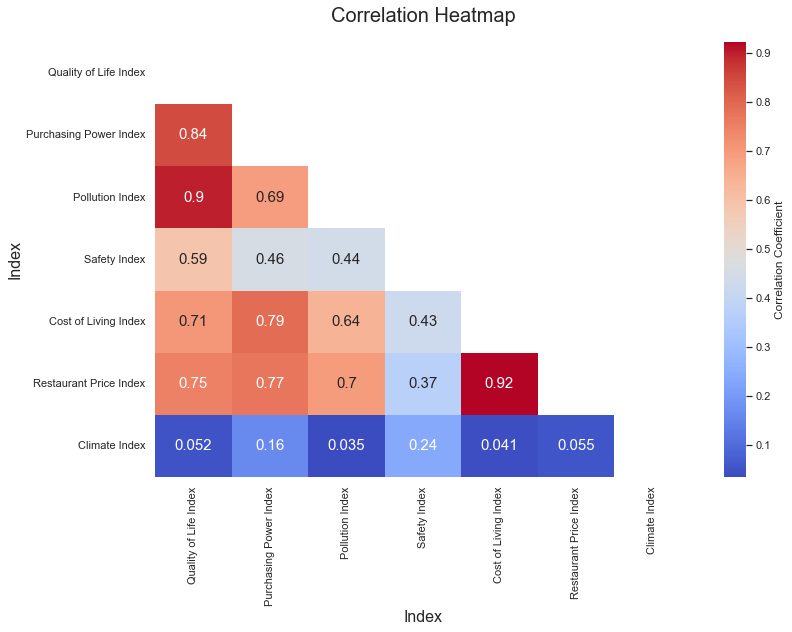

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr_matrix is your correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.set(style="white")
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0, cbar_kws={'label': 'Correlation Coefficient'}, 
            annot_kws={'size': 15}, mask=mask)
plt.title('Correlation Heatmap', fontsize=20, pad=20)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Index', fontsize=16)
sns.despine(left=True, bottom=True)
plt.show()


In [153]:
import pandas as pd
import numpy as np

# Assuming df8 is your DataFrame
corr_matrix = df8.corr().abs()

# Exclude the diagonal by setting diagonal elements to zero
np.fill_diagonal(corr_matrix.values, 0)

# Find the indices of the maximum correlation value
max_corr_index = np.unravel_index(np.argmax(corr_matrix.values), corr_matrix.shape)

# Extract the column names and the maximum correlation value
column1, column2, max_corr_value = df8.columns[max_corr_index[0]], df8.columns[max_corr_index[1]], corr_matrix.iloc[max_corr_index]

# Display the result
print(f"The maximum correlation (excluding diagonal) is between columns {column1} and {column2}: {max_corr_value}")


The maximum correlation (excluding diagonal) is between columns Cost of Living Index and Restaurant Price Index: 0.922628180419359


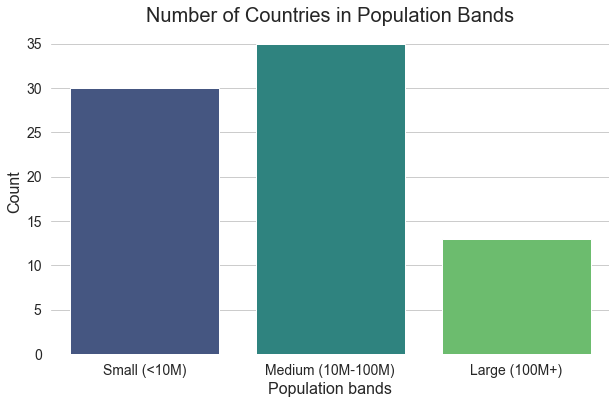

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with columns 'Country', 'Population'
# Adjust the bin edges based on your data
bins = [0, 10000000, 100000000, float('inf')]
labels = ['Small (<10M)', 'Medium (10M-100M)', 'Large (100M+)']

df['Population Band'] = pd.cut(df['Population'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Population Band', data=df, palette='viridis')
plt.title('Number of Countries in Population Bands', fontsize = 20)
plt.xlabel('Population bands', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()


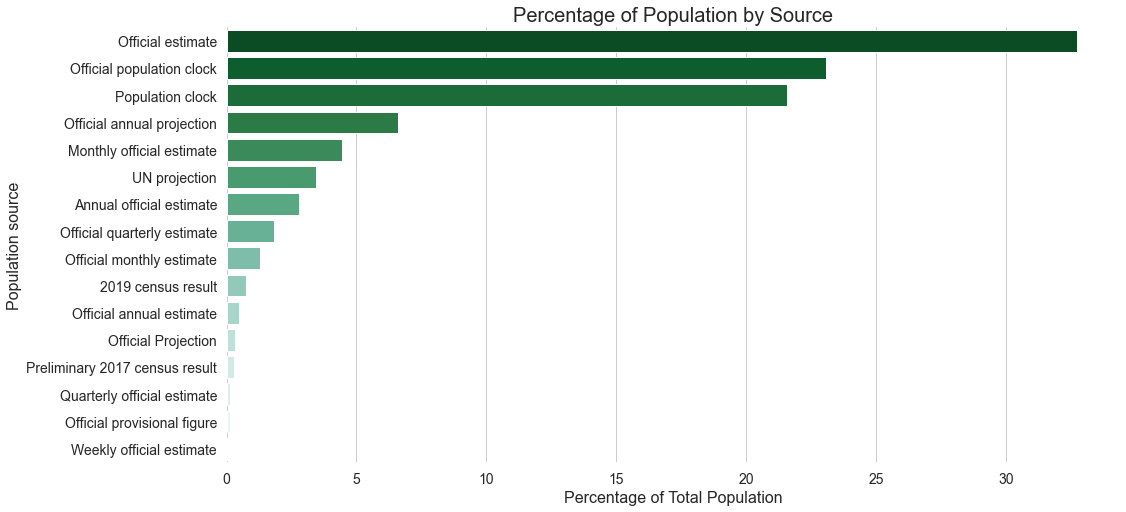

In [175]:
# Assuming df is your DataFrame with columns 'Country', 'Population', 'Population source'
sns.set(style='whitegrid')
plt.figure(figsize=(16, 8))
sns.barplot(y='Population source', x='Population', data=df, 
            estimator=lambda x: sum(x) / df['Population'].sum() * 100, 
            palette='BuGn_r', order=df.groupby('Population source')['Population'].sum().sort_values(ascending=False).index, ci = None)
plt.title('Percentage of Population by Source', fontsize=20)
plt.xlabel('Percentage of Total Population', fontsize=16)
plt.ylabel('Population source', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()


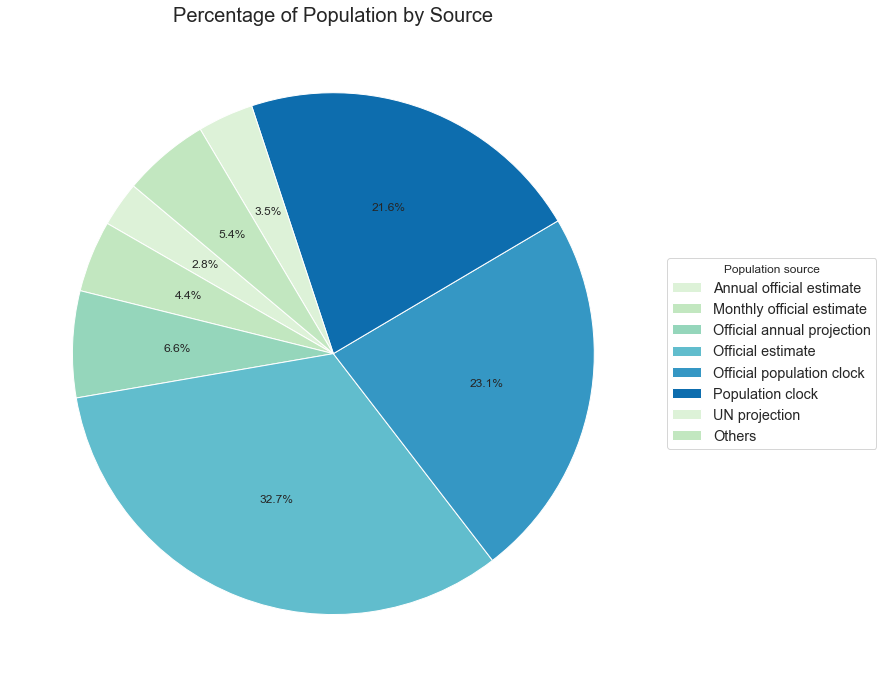

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with columns 'Country', 'Population', 'Population source'
sns.set(style='whitegrid')
plt.figure(figsize=(12, 12))

# Calculate the percentage of population by source
population_percentages = df.groupby('Population source')['Population'].sum() / df['Population'].sum() * 100

# Group categories with less than 1% into 'Others'
threshold = 2
population_percentages_others = population_percentages[population_percentages >= threshold]
population_percentages_others['Others'] = population_percentages[population_percentages < threshold].sum()

# Plotting as a pie chart
plt.pie(population_percentages_others, labels=None, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('GnBu'))

# Add a legend
plt.legend(population_percentages_others.index, title='Population source', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')

# Add a title
plt.title('Percentage of Population by Source', fontsize=20)

# Show the pie chart
plt.show()


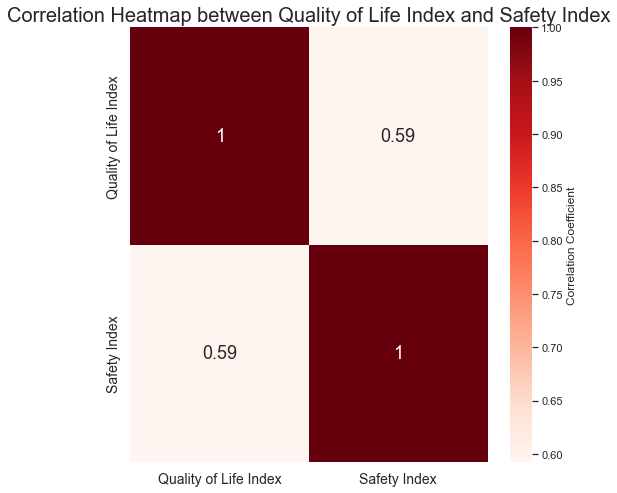

In [158]:
# Assuming df is your DataFrame with columns 'Country', 'Quality of Life Index', 'Safety Index'
plt.figure(figsize=(8, 8))
sns.heatmap(df[['Quality of Life Index', 'Safety Index']].corr(), annot=True, cmap='Reds', linewidths=0, cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 18})
plt.title('Correlation Heatmap between Quality of Life Index and Safety Index', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()


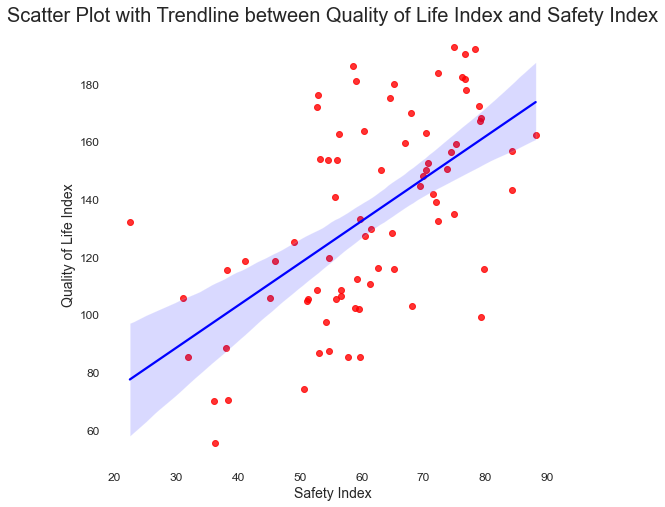

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with columns 'Country', 'Quality of Life Index', 'Safety Index'
plt.figure(figsize=(8, 8))

# Scatter plot with trendline
sns.regplot(y='Quality of Life Index', x='Safety Index', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

# Add a title
plt.title('Scatter Plot with Trendline between Quality of Life Index and Safety Index', fontsize=20)

# Customize axis labels and ticks
plt.ylabel('Quality of Life Index', fontsize=14)
plt.xlabel('Safety Index', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove grids and spines for aesthetics
plt.grid(False)
sns.despine(left=True, bottom=True)

# Show the scatter plot
plt.show()


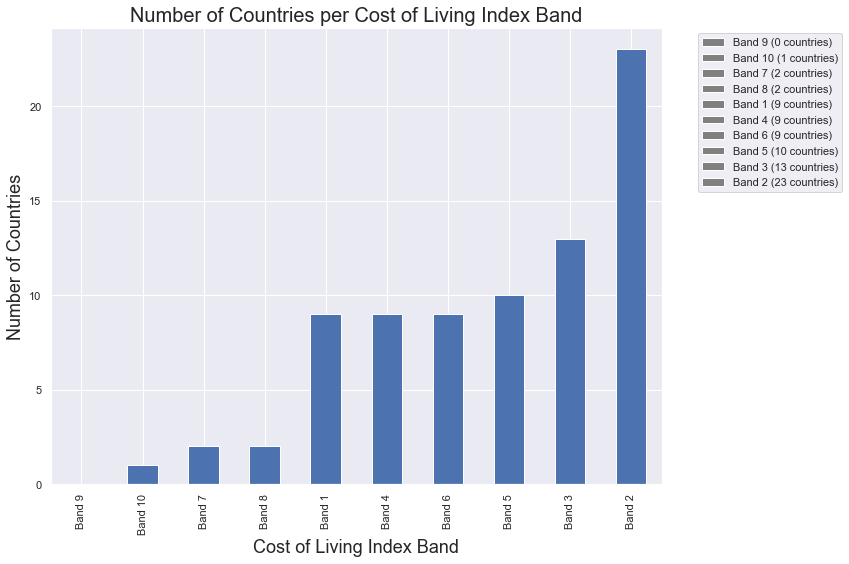

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
max_coi = df['Cost of Living Index'].max()
min_coi = df['Cost of Living Index'].min()
range_coi = max_coi - min_coi

# Calculate band width
band_width = range_coi / 10

# Create bins
bins = [min_coi + i * band_width for i in range(11)]

# Bin the data
df['COI_Band'] = pd.cut(df['Cost of Living Index'], bins=bins, labels=[f"Band {i+1}" for i in range(10)], include_lowest=True)

# Count the number of countries in each band and sort
band_counts = df['COI_Band'].value_counts().sort_index()
sorted_band_counts = band_counts.sort_values()

# Create a dictionary for the legend
legend_labels = {f"{band} ({count} countries)": count for band, count in sorted_band_counts.items()}

# Plotting
sns.set(style = 'darkgrid')
plt.figure(figsize=(12, 8))  # Set the size of the plot
ax = sorted_band_counts.plot(kind='bar')
plt.title('Number of Countries per Cost of Living Index Band', fontsize = 20)
plt.xlabel('Cost of Living Index Band', fontsize = 18)
plt.ylabel('Number of Countries', fontsize = 18)

# Add legend outside the plot
ax.legend([plt.Rectangle((0,0),1,1,fc="gray") for label in legend_labels.keys()],
           [label for label in legend_labels.keys()], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Band 1 : (21.98, 31.59)
Band 2 : (31.61, 35.31)
Band 3 : (35.72, 39.01)
Band 4 : (39.12, 40.85)
Band 5 : (40.98, 48.34)
Band 6 : (49.28, 53.67)
Band 7 : (53.77, 61.98)
Band 8 : (64.04, 70.38)
Band 9 : (71.05, 77.22)
Band 10 : (78.18, 101.43)


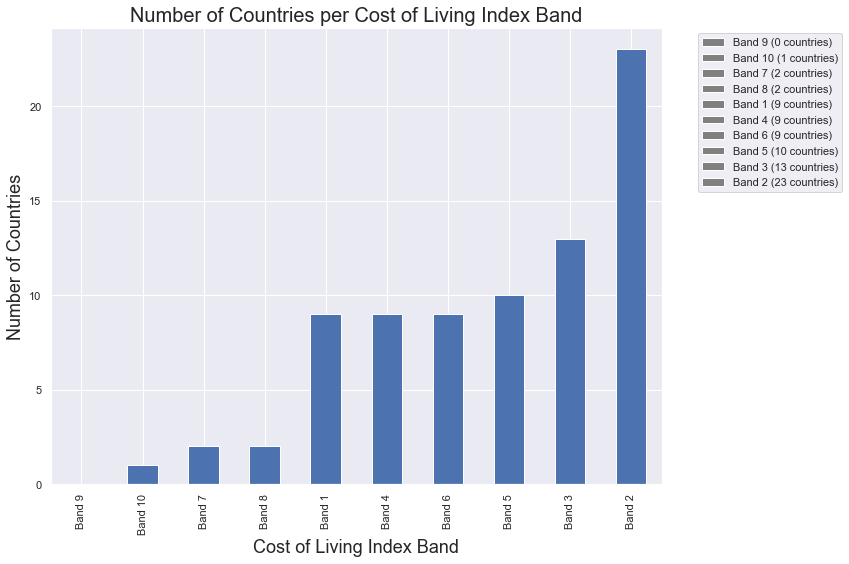

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
max_coi = df['Cost of Living Index'].max()
min_coi = df['Cost of Living Index'].min()
range_coi = max_coi - min_coi

# Calculate band width
band_width = range_coi / 10

# Create bins
bins = [min_coi + i * band_width for i in range(11)]

# Bin the data
df['COI_Band'] = pd.cut(df['Cost of Living Index'], bins=bins, labels=[f"Band {i+1}" for i in range(10)], include_lowest=True)

# Count the number of countries in each band and sort
band_counts = df['COI_Band'].value_counts().sort_index()
sorted_band_counts = band_counts.sort_values()

# Create a dictionary for the legend
legend_labels = {f"{band} ({count} countries)": count for band, count in sorted_band_counts.items()}

# Print the band ranges
for band, range_values in band_ranges.items():
    print(band, ":", range_values)
# Plotting
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))  # Set the size of the plot
ax = sorted_band_counts.plot(kind='bar')
plt.title('Number of Countries per Cost of Living Index Band', fontsize=20)
plt.xlabel('Cost of Living Index Band', fontsize=18)
plt.ylabel('Number of Countries', fontsize=18)

# Add vertical lines for bin boundaries
for bin_boundary in bins:
    plt.axvline(x=bin_boundary, color='red', linestyle='--', alpha=0.7)

# Add legend outside the plot
ax.legend([plt.Rectangle((0, 0), 1, 1, fc="gray") for label in legend_labels.keys()],
          [label for label in legend_labels.keys()], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [187]:
# Extracting the lower and upper bounds of each band
lower_bounds = [float(r.split(' - ')[0]) for r in legend_labels.values()]
upper_bounds = [float(r.split(' - ')[1]) for r in legend_labels.values()]
band_labels = list(legend_labels.keys())

# Calculating the mid-point of each range for plotting
mid_points = [(lower + upper) / 2 for lower, upper in zip(lower_bounds, upper_bounds)]
heights = [upper - lower for lower, upper in zip(lower_bounds, upper_bounds)]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(band_labels, heights, bottom=lower_bounds, color='skyblue', edgecolor='black')
plt.title('Range of Cost of Living Index for Each Band')
plt.xlabel('Band')
plt.ylabel('Cost of Living Index Range')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adding the range values as text on each bar
for i in range(len(band_labels)):
    plt.text(i, lower_bounds[i] + heights[i] / 2, f'{lower_bounds[i]:.2f} - {upper_bounds[i]:.2f}',
             ha='center', va='center')

plt.tight_layout()
plt.show()


AttributeError: 'int' object has no attribute 'split'